In [1]:
import pandas as pd
import numpy as np

In [2]:
df_fin_ratio = pd.read_csv('fin ratios.csv')
df_fin_ratio.head()

,gvkey,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,...,sale_nwc,rd_sale,adv_sale,staff_sale,accrual,ptb,PEG_trailing,DIVYIELD,PEG_1yrforward,PEG_ltgforward
0,1034,12/31/1998,09/30/1999,01/31/2000,63.318,0.339,11.702,27.200,28.333,28.333,...,3.893,0.052,0.0,0.0,0.018,2.068,NaN,.529%,0.903,1.139
1,1034,12/31/1999,12/31/1999,02/29/2000,40.468,0.425,12.307,25.460,26.841,27.264,...,3.366,0.055,0.0,0.0,0.032,1.797,NaN,.520%,0.869,1.096
2,1034,12/31/1999,12/31/1999,03/31/2000,43.043,0.425,12.307,27.022,28.488,28.937,...,3.366,0.055,0.0,0.0,0.032,1.912,NaN,.490%,1.140,1.175
3,1034,12/31/1999,12/31/1999,04/30/2000,45.239,0.425,12.307,28.401,29.942,30.413,...,3.366,0.055,0.0,0.0,0.032,2.009,NaN,.466%,1.199,1.235
4,1034,12/31/1999,03/31/2000,05/31/2000,67.505,0.342,10.187,33.000,36.940,37.786,...,3.810,0.053,0.0,0.0,0.014,2.692,NaN,.364%,1.406,1.444


In [3]:
df_fin_ratio['gvkey'].nunique()

1244

In [4]:
df = pd.read_csv('healthcare_fundamentals_v3.csv')

C:\Users\Joseph\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (23,33,37,955,956,957,962,976,977) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#create cik - GVKEY table from fundamentals dataset
key_table = df[['cik', 'GVKEY']]
key_table

,cik,GVKEY
0,319126.0,1021
1,319126.0,1021
2,319126.0,1021
3,319126.0,1021
4,319126.0,1021
...,...,...
14060,1567529.0,287111
14061,1138776.0,293754
14062,1138776.0,293754
14063,1553846.0,296885


In [6]:
# Bankrupt healthcare companies
df_bankrupt = pd.read_csv('healthcare_bankrupt_audit_analytics_v2.csv')
len(df_bankrupt)
#df_bankrupt.columns

187

In [7]:
#create year column
df_bankrupt['bankrupt_year'] = pd.to_datetime(df_bankrupt['BANK_BEGIN_DATE']).dt.year

#filter for yaer 2000- 2010
mask = (df_bankrupt['bankrupt_year']  >2000) &  (df_bankrupt['bankrupt_year']  < 2011)

df_bankrupt_2000 = df_bankrupt[mask]

df_bankrupt_2000.shape

(129, 465)

In [47]:
# Get chapter 11 companies only
df_bankrupt_ch_11 = df_bankrupt_2000[df_bankrupt['BANKRUPTCY_TYPE']==11]
len(df_bankrupt_ch_11)

C:\Users\Joseph\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


82

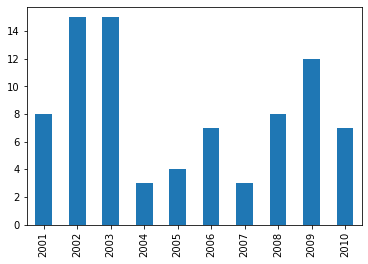

In [66]:
df_bankrupt_ch_11['bankrupt_year'].value_counts().sort_index().plot(kind = 'bar')

In [28]:
# df_bankrupt_ch_11['COMPANY_FKEY']

In [81]:
#link table to bankrupted companies
df_table  = pd.merge(df_bankrupt_ch_11, key_table, left_on = 'COMPANY_FKEY', right_on = 'cik', suffixes = ('_ratio', '_key'), how = 'inner')
df_table = df_table.drop_duplicates()

In [82]:
#link fin ratios to bankrupted companies
df_merge = pd.merge(df_fin_ratio, df_table, left_on = 'gvkey', right_on = 'GVKEY', suffixes = ('_fundam', '_bank'), how = 'right')

In [83]:
df_merge['cik'].nunique()

81

In [84]:
df_merge

,gvkey,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,...,HIWATER_INCMST_NETINC_TTM_DATE,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3,bankrupt_year,cik,GVKEY
0,2940.0,09/30/1999,09/30/1999,01/31/2000,37.510,0.841,6.643,7.661,7.745,10.179,...,2004-09-30,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940
1,2940.0,09/30/1999,12/31/1999,02/29/2000,-55.382,0.986,6.768,6.528,6.601,8.048,...,2004-09-30,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940
2,2940.0,09/30/1999,12/31/1999,03/31/2000,-45.366,0.986,6.768,5.347,5.407,6.592,...,2004-09-30,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940
3,2940.0,09/30/1999,12/31/1999,04/30/2000,-35.350,0.986,6.768,4.167,4.213,5.137,...,2004-09-30,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940
4,2940.0,09/30/1999,03/31/2000,05/31/2000,110.101,0.991,6.877,3.036,3.080,3.427,...,2004-09-30,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2003-06-30,4922000.0,2003-06-30,0.0,NaN,NaN,NaN,2010,1145238.0,149297
3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2007-12-28,2326382.0,NaN,NaN,2007-11-15,NaN,NaN,2010,1330487.0,165414
3245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2005-12-31,-10240000.0,2005-12-31,0.0,NaN,NaN,NaN,2010,1355804.0,174692
3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2006-10-13,NaN,NaN,2004,1375098.0,176522


In [85]:
#create bankruptcy dummy
mask = pd.to_datetime(df_merge['adate']).dt.year + 1 == pd.to_datetime(df_merge['BANK_BEGIN_DATE']).dt.year

df_merge['bankrupted'] = np.where(mask, 1,0)

In [87]:
df_merge

,gvkey,adate,qdate,public_date,CAPEI,bm,evm,pe_op_basic,pe_op_dil,pe_exi,...,HIWATER_INCMST_NETINC_TTM,HIWATER_INCMST_NETINC_FY_DATE,HIWATER_INCMST_NETINC_FY,NAME_CHANGE_DATE1,NAME_CHANGE_DATE2,NAME_CHANGE_DATE3,bankrupt_year,cik,GVKEY,bankrupted
0,2940.0,09/30/1999,09/30/1999,01/31/2000,37.510,0.841,6.643,7.661,7.745,10.179,...,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940,0
1,2940.0,09/30/1999,12/31/1999,02/29/2000,-55.382,0.986,6.768,6.528,6.601,8.048,...,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940,0
2,2940.0,09/30/1999,12/31/1999,03/31/2000,-45.366,0.986,6.768,5.347,5.407,6.592,...,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940,0
3,2940.0,09/30/1999,12/31/1999,04/30/2000,-35.350,0.986,6.768,4.167,4.213,5.137,...,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940,0
4,2940.0,09/30/1999,03/31/2000,05/31/2000,110.101,0.991,6.877,3.036,3.080,3.427,...,567866000.0,2003-12-31,499948000.0,2014-07-01,1996-02-14,NaN,2003,19411.0,2940,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3243,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4922000.0,2003-06-30,0.0,NaN,NaN,NaN,2010,1145238.0,149297,0
3244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2326382.0,NaN,NaN,2007-11-15,NaN,NaN,2010,1330487.0,165414,0
3245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-10240000.0,2005-12-31,0.0,NaN,NaN,NaN,2010,1355804.0,174692,0
3246,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2006-10-13,NaN,NaN,2004,1375098.0,176522,0
